![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
#Estadística descriptiva

print(bikes.groupby('season').describe(include='all'))


       holiday                                              workingday  \
         count      mean       std  min  25%  50%  75%  max      count   
season                                                                   
1       2686.0  0.026433  0.160450  0.0  0.0  0.0  0.0  1.0     2686.0   
2       2733.0  0.017563  0.131381  0.0  0.0  0.0  0.0  1.0     2733.0   
3       2733.0  0.035126  0.184133  0.0  0.0  0.0  0.0  1.0     2733.0   
4       2734.0  0.035113  0.184100  0.0  0.0  0.0  0.0  1.0     2734.0   

                  ...  total           hour                                 \
            mean  ...    75%    max   count       mean       std  min  25%   
season            ...                                                        
1       0.680566  ...  164.0  801.0  2686.0  11.642591  6.901782  0.0  6.0   
2       0.692645  ...  321.0  873.0  2733.0  11.508965  6.921941  0.0  6.0   
3       0.675082  ...  347.0  977.0  2733.0  11.510428  6.920035  0.0  6.0   
4       0.675

In [12]:
Season=bikes.groupby('season').describe(include='all')
Season.head()
bikes.groupby('season').total.median()

season
1     78.0
2    172.0
3    195.0
4    161.0
Name: total, dtype: float64

## Al realizar la estadística descriptiva podemos identificar que la season 1 presenta una mayor representación en comparación de los otros grupos (2686 datos vs aprox 2733). lo que podría ocasionar un desbalanceo en esta clase para los análisis.
## En relación entre la media y mediana de las diferentes variables a análizar se puede identificar cierta asimetria entre los valores (caso variable total) en donde los valores de la media está por encima de los valores de la mediana indicando posibles valores atípicos altos. 


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
#Estadística descriptiva

print(bikes.groupby('hour').describe(include='all'))

     season                                                holiday            \
      count      mean       std  min   25%  50%   75%  max   count      mean   
hour                                                                           
0     455.0  2.503297  1.118275  1.0  2.00  3.0  3.50  4.0   455.0  0.028571   
1     454.0  2.502203  1.119265  1.0  2.00  2.5  3.75  4.0   454.0  0.028634   
2     448.0  2.522321  1.113047  1.0  2.00  3.0  4.00  4.0   448.0  0.029018   
3     433.0  2.556582  1.100151  1.0  2.00  3.0  4.00  4.0   433.0  0.027714   
4     442.0  2.545249  1.106152  1.0  2.00  3.0  4.00  4.0   442.0  0.029412   
5     452.0  2.513274  1.115225  1.0  2.00  3.0  4.00  4.0   452.0  0.028761   
6     455.0  2.503297  1.118275  1.0  2.00  3.0  3.50  4.0   455.0  0.028571   
7     455.0  2.503297  1.118275  1.0  2.00  3.0  3.50  4.0   455.0  0.028571   
8     455.0  2.503297  1.118275  1.0  2.00  3.0  3.50  4.0   455.0  0.028571   
9     455.0  2.503297  1.118275  1.0  2.

In [13]:
bikes.groupby('hour').total.median()

hour
0      41.0
1      19.0
2      11.0
3       6.0
4       6.0
5      19.0
6      75.0
7     208.0
8     392.0
9     217.0
10    149.0
11    183.0
12    234.5
13    226.5
14    212.0
15    232.0
16    309.5
17    480.5
18    422.5
19    312.5
20    224.0
21    171.5
22    129.0
23     80.0
Name: total, dtype: float64

## Al realizar la estadística descriptiva podemos identificar que la forma de agrupar las variables de hace proporcional en cada uno de los casos
## En relación entre la media y mediana de las diferentes variables a análizar se puede identificar cierta asimetria entre los valores (caso variable total) en donde los valores de la media está por encima de los valores de la mediana indicando posibles valores atípicos altos. 


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

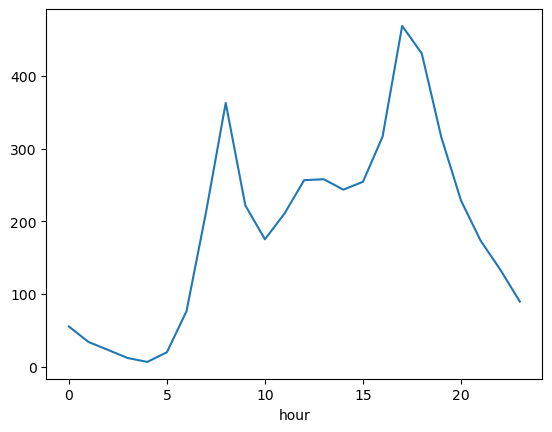

In [14]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

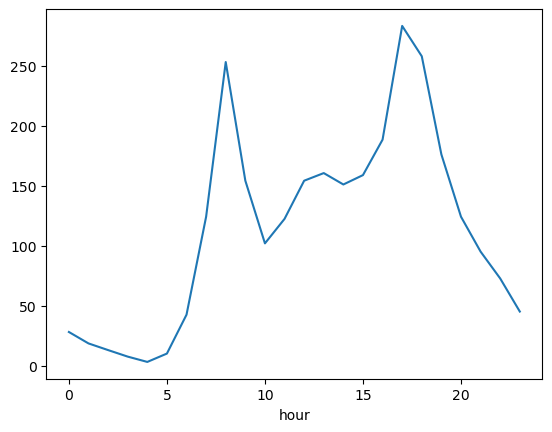

In [15]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

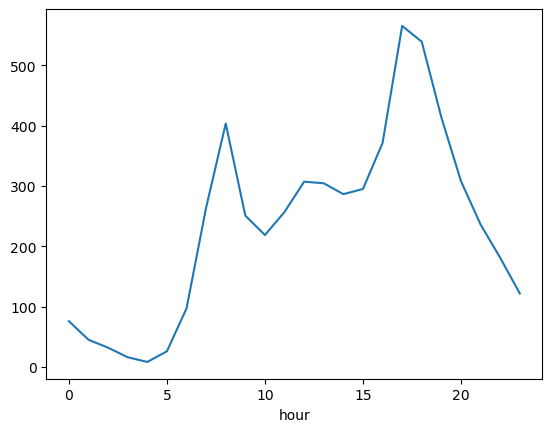

In [16]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()


## A pesar que presentan una distribución similar (en relación a la forma) esto debido a que sus máximos y mínimos se presentan en horas similares; además identificamos que la season 3 presenta valores más altos que los de la season 1 ya que los valores máximos del season3 superan los 500, mientras que los del season1 no superan los 3


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [86]:
# Celda 3
# Utilizar la función get_dummies para crear variables dummy
dummy_variables = pd.get_dummies(bikes['season'], prefix='season')
dummy_variables['season_1'] = dummy_variables['season_1'].astype(int)
dummy_variables['season_2'] = dummy_variables['season_2'].astype(int)
dummy_variables['season_3'] = dummy_variables['season_3'].astype(int)
dummy_variables['season_4'] = dummy_variables['season_4'].astype(int)
X=bikes['hour']
X = pd.concat([X, dummy_variables], axis=1)
print(X)
y=bikes['total']
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)


# Imprimir los coeficientes
print('Intercepto:', modelo.intercept_)
print('Coeficiente:', modelo.coef_)


                     hour  season_1  season_2  season_3  season_4
datetime                                                         
2011-01-01 00:00:00     0         1         0         0         0
2011-01-01 01:00:00     1         1         0         0         0
2011-01-01 02:00:00     2         1         0         0         0
2011-01-01 03:00:00     3         1         0         0         0
2011-01-01 04:00:00     4         1         0         0         0
...                   ...       ...       ...       ...       ...
2012-12-19 19:00:00    19         0         0         0         1
2012-12-19 20:00:00    20         0         0         0         1
2012-12-19 21:00:00    21         0         0         0         1
2012-12-19 22:00:00    22         0         0         0         1
2012-12-19 23:00:00    23         0         0         0         1

[10886 rows x 5 columns]
Intercepto: 69.53671247143548
Coeficiente: [ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294]


In [87]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones con el modelo ajustado
predicciones = modelo.predict(X)

# Calcular el MSE entre las predicciones y las etiquetas verdaderas
mse = mean_squared_error(y, predicciones)

# Imprimir el MSE
print('Error Cuadrático Medio (MSE):', mse)

Error Cuadrático Medio (MSE): 25480.694694371625


## En relación a los coeficientes se identifica que existe una relación positiva entre horas, season 2, 3 y 4 y negativa con la season 1. La mayor limitación que se encuentra es la suposición de que las relaciones entre las variables independientes y dependientes es lineal.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [57]:
X=bikes[['season','hour']]

In [58]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001


In [59]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [60]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [70]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train y y_train serán los datos de entrenamiento
# X_test y y_test serán los datos de prueba


In [71]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 6)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

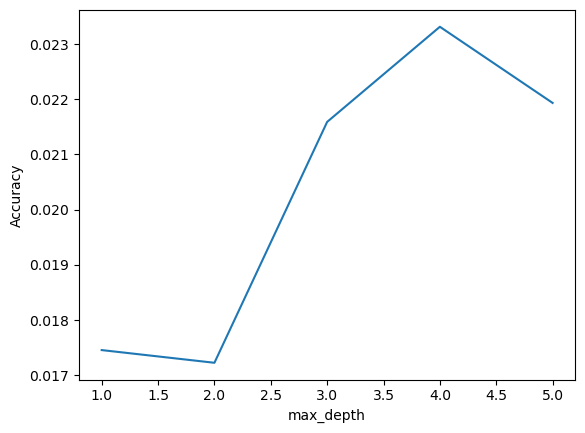

In [72]:
# Celda 5
import matplotlib.pyplot as plt
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [73]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.02331221874711324, 4)

In [82]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [83]:
# Supongamos que tienes nuevos datos en un DataFrame llamado 'nuevos_datos'

# Realizar predicciones con el modelo entrenado
predicciones = clf.predict(X_test)

# Las predicciones contendrán las etiquetas predichas para los nuevos datos
print(predicciones)


[232   1 232 ...  64 232 232]


In [85]:
from sklearn.metrics import mean_squared_error

# Supongamos que tienes las etiquetas verdaderas de tus nuevos datos en una variable llamada 'etiquetas_verdaderas'

# Calcular el error cuadrático medio entre las predicciones y las etiquetas verdaderas
mse = mean_squared_error(y_test, predicciones)

# Imprimir el error cuadrático medio
print('Error Cuadrático Medio (MSE):', mse)


Error Cuadrático Medio (MSE): 23531.02479338843


## (MSE_Regresión lineal): 25480.694694371625 vs (MSE_Arból): 23531.02479338843; nos indica menores valores en el arbol evaluado siendo un mejor modelo

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [88]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [89]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [90]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [92]:
# Celda 6
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

models = {'dt': DecisionTreeRegressor(),
          'rl':LogisticRegression()}

In [95]:
# Entrenamiento (fit) de cada modelo
for model in models.keys():
    models[model].fit(X_train, y_train)

In [97]:
# Predicción de las observaciones del set de test para cada modelo
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [98]:
# Evaluación del error de cada modelo
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

dt 0.6742897497861484
rl 0.6223610956135781


In [102]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

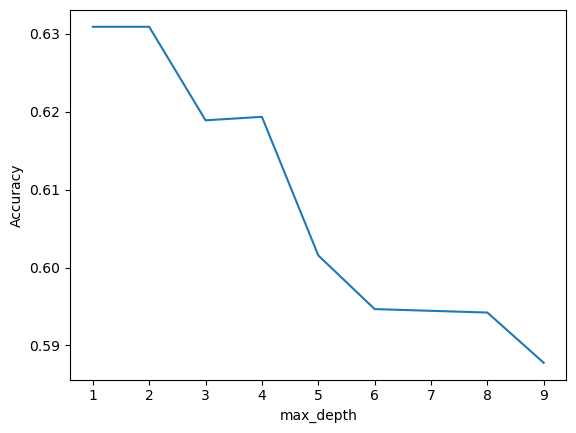

In [103]:
import matplotlib.pyplot as plt
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [104]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
DTC = DecisionTreeClassifier(max_depth=2, random_state=1)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [105]:
from sklearn.metrics import accuracy_score, f1_score

# Lista para almacenar la precisión y el F1-Score de cada modelo
precisiones = []
f1_scores = []

# Calcular la precisión y el F1-Score para cada modelo
for model in models.keys():
    precision = accuracy_score(y_test, y_pred[model])
    f1 = f1_score(y_test, y_pred[model], average='weighted')
    precisiones.append(precision)
    f1_scores.append(f1)

# Imprimir la precisión y el F1-Score de cada modelo
for i, model in enumerate(models.keys()):
    print(model, " - Precisión:", precisiones[i], " - F1-Score:", f1_scores[i])


dt  - Precisión: 0.5453333333333333  - F1-Score: 0.5453333333333333
rl  - Precisión: 0.6126666666666667  - F1-Score: 0.6126107143158753



### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [125]:
# Celda 7

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


base_classifier = DecisionTreeClassifier(max_depth=10)
bagged_classifierprof = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, max_samples=300, random_state=42, n_jobs=-1)
bagged_classifierprof.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=300, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [134]:
# Realizar predicciones en el conjunto de prueba
y_pred = bagged_classifierprof.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.6593333333333333
F1-score: 0.6593265199727465


In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
bagged_classifierhojas = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, max_samples=300, random_state=42, n_jobs=-1)
bagged_classifierhojas.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=10),
                  max_samples=300, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [135]:
y_pred = bagged_classifierhojas.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.662
F1-score: 0.661895875591616


In [185]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


base_classifier = LogisticRegression(max_iter=100000)
lg = BaggingClassifier(base_estimator=base_classifier, 
                                               n_estimators=100, 
                                               max_samples=300, 
                                               random_state=42, 
                                               n_jobs=-1)
lg.fit(X_train, y_train)
y_pred_bagged_logistic = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bagged_logistic)
f1 = f1_score(y_test, y_pred_bagged_logistic)

print("Accuracy:", accuracy)
print("F1 Score:", f1)




Accuracy: 0.628
F1 Score: 0.6157024793388429


In [149]:
y_pred = bagged_classifierlg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.62
F1-score: 0.619891891891892


In [186]:
from sklearn.ensemble import VotingClassifier

voting_mayor = VotingClassifier(estimators=[
    ('bch', bagged_classifierhojas),
    ('bcp', bagged_classifierprof),
    ('lg',lg)
], voting='hard')  # 'hard' para votación mayoritaria

# Entrenar el ensamble en los mismos datos de entrenamiento
voting_mayor.fit(X_train, y_train)

# Realizar predicciones con el ensamble en el conjunto de prueba
y_pred_voting = voting_mayor.predict(X_test)

# Calcular la precisión (accuracy) y el F1-score del ensamble
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print("Ensamble con votación mayoritaria")
print("Accuracy:", accuracy_voting)
print("F1-score:", f1_voting)


Ensamble con votación mayoritaria
Accuracy: 0.6573333333333333
F1-score: 0.6572778926519821


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [161]:
# Celda 8

from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Predicción y desempeño al hacer votación mayoritaria
bagged_classifierprof.fit(X_train, y_train)
y_pred = bagged_classifierprof.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(bagged_classifierprof.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], bagged_classifierprof.n_estimators))

for i in range(bagged_classifierprof.n_estimators):
    oob_sample = ~bagged_classifierprof.estimators_samples_[i]
    y_pred_ = bagged_classifierprof.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagged_classifierprof.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)


f1, accuracy


(0.6586506346025384, 0.6593333333333333)

In [164]:
# Desempeño al hacer votación ponderada
from sklearn import metrics
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6289308176100629, 0.646)

In [165]:
# Predicción y desempeño al hacer votación mayoritaria
bagged_classifierhojas.fit(X_train, y_train)
y_pred = bagged_classifierhojas.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(bagged_classifierhojas.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], bagged_classifierhojas.n_estimators))

for i in range(bagged_classifierhojas.n_estimators):
    oob_sample = ~bagged_classifierhojas.estimators_samples_[i]
    y_pred_ = bagged_classifierhojas.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagged_classifierhojas.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)


f1, accuracy

(0.6572008113590264, 0.662)

In [166]:
# Desempeño al hacer votación ponderada
from sklearn import metrics
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6289308176100629, 0.646)

In [191]:
# Predicción y desempeño al hacer votación mayoritaria
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(lg.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], lg.n_estimators))

for i in range(lg.n_estimators):
    oob_sample = ~lg.estimators_samples_[i]
    y_pred_ = lg.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = lg.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)


f1, accuracy

(0.6157024793388429, 0.628)

In [189]:
# Desempeño al hacer votación ponderada
from sklearn import metrics
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.611535788742182, 0.6273333333333333)

In [194]:

# Definir los modelos individuales
voting_pond = VotingClassifier(estimators=[
    ('bch', bagged_classifierhojas),
    ('bcp', bagged_classifierprof),
    ('lg',lg)
]

# Configurar el clasificador de votación ponderada
voting_classifier = VotingClassifier(estimators=voting_pond, voting='soft')

# Entrenar el clasificador de votación ponderada
voting_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_voting = voting_classifier.predict(X_test)

# Evaluar el desempeño del clasificador de votación ponderada
accuracy = accuracy_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)

print("Accuracy (Votación ponderada):", accuracy)
print("F1 Score (Votación ponderada):", f1)



Accuracy (Votación ponderada): 0.6626666666666666
F1 Score (Votación ponderada): 0.6590296495956873


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
Votación mayoritaria 
Accuracy: 0.6573333333333333
F1-score: 0.6572778926519821
Votación ponderada
Accuracy : 0.6626666666666666
F1 Score : 0.6590296495956873
Al realizar la comparación nos muestra mejores resultados en la votación ponderada, la ventaja que tiene la votación ponderada es la capacidad de calibrar que ciertos casos tengan mayor relevancia dentro del modelo. En el caso de la votación mayoritaria lo que da la capacidad de realizar los ajustes para modelos donde exista un mejor desempeño puede verse opacado por modelos que no tengan buen desempeño
